# **Multi Dimensional Scaling (MDS)**

MDS is a dimensionality reduction technique that is used to project high-dimensional data onto a lower-dimensional space while preserving the pairwise distances between the data points as much as possible. 

MDS is commonly used to visualize complex, high-dimensional data, and to identify patterns and relationships that may not be apparent in the original space. It can be applied to a wide range of data types, including numerical, categorical, and mixed data.

Sources:<br>
[Guide to Multidimensional Scaling in Python with Scikit-Learn (Stack Abuse)](https://stackabuse.com/guide-to-multidimensional-scaling-in-python-with-scikit-learn/)<br>
[Multidimensional Scaling (MDS) using Scikit Learn (Geeks for Geeks)](https://www.geeksforgeeks.org/multidimensional-scaling-mds-using-scikit-learn/)

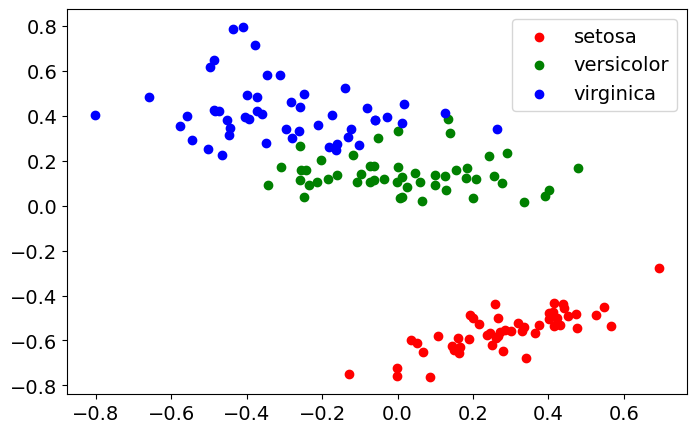

In [19]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

# Load the iris educational DS
data = load_iris()
X = data.data

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Build MDS in 2 dimensions
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X_scaled)

# Plot the new attributes in a scatter plot
colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size = 14)

plt.figure(figsize=(8,5))

for i in np.unique(data.target):
    subset = X_2d[data.target == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x, y, c=colors[i], label = data.target_names[i])

plt.legend()
plt.show()

#### ☝️Interpretation
 - The species labels (setosa, versicolor, virginica) are placed along these axes, suggesting their positions in the reduced 2D space
 - If their positions overlap or are close in the MDS plot, it suggests they share more similarities in the original features. If they are further away they are dissimilar suggesting unique characteristics (e.g., smaller petal/sepal sizes).
 - Overlapping features (in this case virginica and versicolor) overlap, this suggests they are intermediate and may overlap in some features.
 - Versicolor and virginica overlap because their measurements are more similar, especially in petal width/length.

 In practice, this means Setosa is easy to classify while Versicolor and Virginica are challenging to distinguish due to their overlap.


<br>**<div class="alert alert-block alert-info">Important observation:** <br>The negativity doesn’t imply that the original features (e.g., sepal length) have negative values. It’s purely about relative positioning.
</div>

#### Potential next steps

Use PCA for cross-validation. If PCA’s first two components show similar separation, then the MDS interpretation is robust.